# NOEMA Sample

|VFID |NED Name |Halpha Obs| Halpha CS | Mstar Image | Figure |
|----|----|---|---|---|---|
|VFID2822 |PGC25063|INT | | | |
|VFID2140 |IC4336|BOK, HDIx2 | | | |
|VFID3574 |NGC6186 |HDI | | | |

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
from PIL import Image

import glob
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plotdir = homedir+'/research/Virgo/plots/halpha/'

table directory =  /Users/rfinn/research/Virgo/tables-north/v2/
number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 640x480 with 0 Axes>


####################################'
VFID2822
####################################'

9.277
logMstar = 9.3
VFID =  VFID2822
VFID =  VFID2822
adding logMstar =  9.3

####################################'
VFID2140
####################################'

9.852
logMstar = 9.9
VFID =  VFID2140
VFID =  VFID2140
adding logMstar =  9.9

####################################'
VFID3574
####################################'

10.4
logMstar = 10.4
VFID =  VFID3574
VFID =  VFID3574
adding logMstar =  10.4


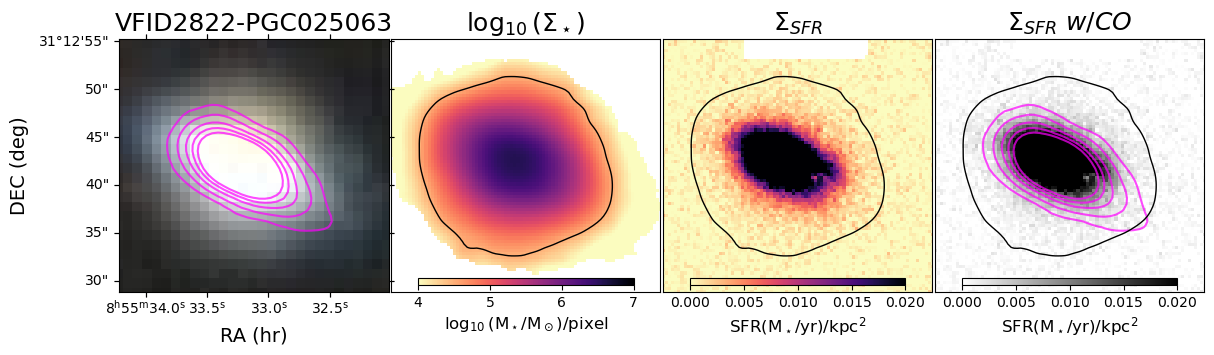

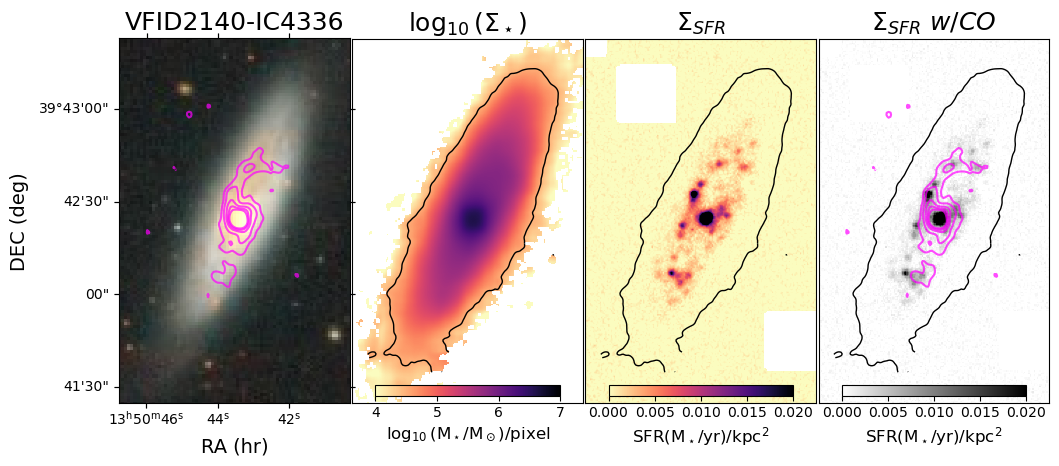

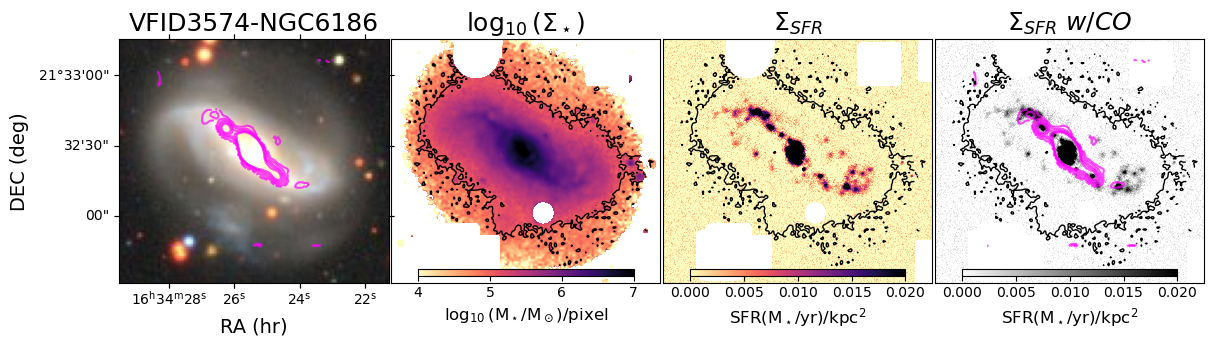

In [41]:
#from scipy.integrate import simpson
import os
%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py

os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

scales = {'VFID5842':1.06,'VFID5844':1.03,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':.99,'VFID5889':1.0,'VFID5892':0.98}

rmax_dict = {'VFID5851':160,'VFID5842':120.,'VFID5859':20,'VFID5892':100,\
             'VFID5855':150,'VFID5889':220,'VFID5844':30,'VFID5879':40,\
             'VFID6018':100,'VFID6033':100,'VFID6091':100,'VFID6362':100,'VFID5709':100,\
            'VFID2140':100,'VFID2822':100,'VFID3574':100}
#rmax = [160,120,20,100,200,220]


alldirs = ['VFID5855-NGC5348-INT-20190206-p120',\
          'VFID5842-NGC5356-INT-20190206-p120',\
          'VFID6018-NGC5560-INT-20190208-p131',\
          'VFID6033-NGC5566-INT-20190208-p131',\
          'VFID6091-NGC5577-INT-20190207-p134',\
          'VFID6362-UGC09661-BOK-20210418-VFID6406',\
          'VFID6362-UGC09661-MOS-20110404-NGC5846_02']

#####################
## NOEMA DIRECTORIES
#####################
alldirs = [
    'VFID2822-FBQSJ085533.2+311242-INT-20190206-p018',
    'VFID2140-IC4336-BOK-20220424-VFID2162',
    'VFID3574-NGC6186-HDI-20200229-p080'
           ]

# starts at SNR=2 and step by 1
# levels for NGC5348
# gianluca's values  [0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452 0.1976736, 0.22591269, 0.25415178]
COlevels = np.array([.03,0.05647817, 0.08471726, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([0.026,.04,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])

#COlevels = np.array([.06,.078,.2,0.557371, 1.08861,1.61986,2.1511])#, 0.11295635, 0.14119543, 0.16943452, 0.1976736, 0.22591269, 0.25415178])
COlevels = np.array([.06,.2,0.557371, 1.08861,1.61986,2.1511])

COlevels = np.array([.2,0.557371, 1.08861,1.61986,2.1511])
for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #%run ~/github/havirgo/python/make_mstar_image.py $d 
    #print("rmax = ",i,rmax[i])
    vfid = d.split('-')[0]

    vr = v.env['Vcosmic'][v.main['VFID'] == vfid][0]
    logMstar = v.magphys['logMstar_med'][v.main['VFID'] == vfid][0]
    if logMstar < 0.1:
        logMstar = v.magphys['logMstar_best'][v.main['VFID'] == vfid][0]
    print(logMstar)
    logMstar_string = f"{logMstar:.1f}"
    print(f"logMstar = {logMstar_string}")

    cocolor='magenta'
    #cocolor='chartreuse'
    objname = v.main['objname'][v.main['VFID'] == vfid][0]
    alt_title = f"{vfid}-{objname}"
    #plot_mstar_sfr_COall(d,rmax=rmax_dict[vfid],vr=vr,logMstar=logMstar_string,COcolor=cocolor,COlevels=COlevels)
    plot_mstar_sfr_CO(d,vr=vr,rmax=rmax_dict[vfid],logMstar=logMstar_string,COcolor=cocolor,COlevels=COlevels,noHI=True,alt_title=alt_title)
plt.show()


# Next Time
* get CO levels from gianluca's fig 2 in overleaf
* make depletion maps
* incorporate the rms maps into upper limits for alma sources